Week 1 assignment

Import the necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import json
import os

C:\Users\paulmi\Desktop\MachineLearning
C:\Users\paulmi\Desktop\MachineLearning\test
['doctor-1149149_640.jpg', 'horse-1201143_640.jpg', 'my_cat.jfif', 'my_cat1.png', 'output.jpg', 'woman-1245817_640.jpg']
<class 'numpy.ndarray'>
(1365, 2048, 3)


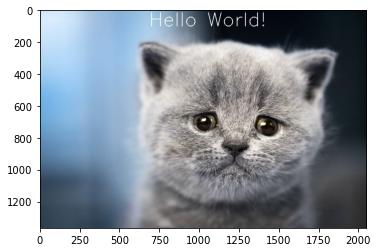

In [5]:
cwd = os.getcwd() #to get the current directory as a string
print(cwd)
test_dir = os.path.join(cwd,'test') #joins the given strings with '\' or '/'(unix) between them and returns it as a string
print(test_dir)
print(os.listdir(test_dir))
img_path=os.path.join(test_dir,os.listdir(test_dir)[2])
img = mpimg.imread(img_path)
print(type(img))
plt.imshow(img)
image = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
plt.imshow(img)
print(image.shape)
position = (int(img.shape[1]/3),100)
cv2.putText(
     image, #numpy array on which text is written
     "Hello World!", #text
     position, #position at which writing has to start
     cv2.FONT_HERSHEY_SIMPLEX, #font family
     4, #font size
     (255, 255, 255), #font color
     3) #font stroke
new_image_path = os.path.join(test_dir,'output.jpg')  
cv2.imwrite(new_image_path, image)
image = cv2.imread(new_image_path,cv2.IMREAD_UNCHANGED)
plt.imshow(image)

Week 2-3 assignment

In [8]:
from tkinter import filedialog, Tk

root = Tk()
root.attributes("-topmost", True) # this also works
# root.lift()
root.withdraw()
input_img_dir =  filedialog.askdirectory(parent=root)
print(input_img_dir)


C:/Users/paulmi/Desktop/MachineLearning/test


Read the data augmentation configuration file

In [9]:
json_file_path = filedialog.askopenfilename(parent=root)
print(json_file_path)
with open(json_file_path,"r",encoding='utf8') as json_file:
    aug_dict = json.load(json_file)
    print(type(aug_dict))
    print(aug_dict)

C:/Users/paulmi/Desktop/MachineLearning/cofiguration.json
<class 'dict'>
{'Flip': 1, 'Rotation': 90}


Read all the images from the selected folder and then apply augmentation methods on each image

In [ ]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    # The cv2.warpAffine function takes the shape parameter in reverse order
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

In [ ]:
def add_light(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    image=cv2.LUT(image, table)
    return image

In [ ]:
def gaussian_blur(image,blur):
    image = cv2.GaussianBlur(image,(5,5),blur)
    return image

In [135]:
#crop
def crop_image(image,y1,y2,x1,x2):
    image=image[y1:y2,x1:x2]
    return image

In [ ]:
def resize_image(image,w,h):
    resized_image = image=cv2.resize(image,(w,h))
    return resized_image

In [10]:
images_names = os.listdir(input_img_dir)
output_dir= input_img_dir+'_aug'
print(output_dir)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
os.chdir(output_dir)
count = 1
for img_name in images_names:
    # read the current image from the chosen folder
    current_img_path = os.path.join(input_img_dir,img_name)
    current_img = cv2.imread(current_img_path)
    current_img = cv2.cvtColor(current_img, cv2.COLOR_BGR2RGB)
    # iterate trough augmentation methods and apply them to the image
    for aug_method,parameters in aug_dict.items():
        if 'flip' in aug_method.lower():
            new_img = cv2.flip(current_img,int(parameter))
            plt.imshow(new_img)
            new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
            cv2.imwrite('_'.join([img_name.split('.')[0],aug_method,str(count)])+'.jpg', new_img)
            count+=1
        if 'rotation' in aug_method.lower():
            new_img = rotate(current_img, parameters)
#             new_img = cv2.rotate(current_img, parameters)
            plt.imshow(new_img)
            new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
            cv2.imwrite('_'.join([img_name.split('.')[0],aug_method,str(count)])+'.jpg', new_img)
            count+=1
os.chdir('../')

C:/Users/paulmi/Desktop/MachineLearning/test_aug


NameError: name 'parameter' is not defined